# Прогнозирование цен акций компаний

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly
from fbprophet import Prophet

In [2]:
data = pd.read_csv('final_data.csv')

In [3]:
DJI_tickers = ['MMM',
               'AXP', 'AAPL', 'BA', 'CAT', 'CVX',
               'CSCO', 'KO', 'DOW', 'XOM', 'GS',
               'HD', 'IBM', 'INTC', 'JNJ', 'JPM',
               'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',
               'PG', 'TRV', 'UNH', 'RTX', 'VZ',
               'V', 'WMT', 'WBA', 'DIS']

holidays = pd.DataFrame({
    'holiday': 'weekend',
    'ds': pd.to_datetime(['2020-10-03', '2020-10-10', '2020-10-17', '2020-10-24', '2020-10-31',
                          '2020-11-07', '2020-11-14', '2020-11-21', '2020-11-28',
                          '2020-12-05', '2020-12-12', '2020-12-19', '2020-12-26']),
    'lower_window': 0,
    'upper_window': 1
})

In [6]:
def forecast(data):
    result = 0   
    flag = 0      
    for ticker in DJI_tickers:
        df = data[['Date', ticker]]
        df.columns = ['ds', 'y']
        m = Prophet()
        m.fit(df)         
        
        if flag==0:
            future = m.make_future_dataframe(periods=31, freq='B')
            result = future[['ds']]
            flag = 1
            
        fc = m.predict(future)
        fc = weekend_clear(fc)
        result[ticker] = fc[['yhat']]
        
    return result

In [7]:
results = forecast(data)

results = results.dropna()
results.to_csv('results.csv')

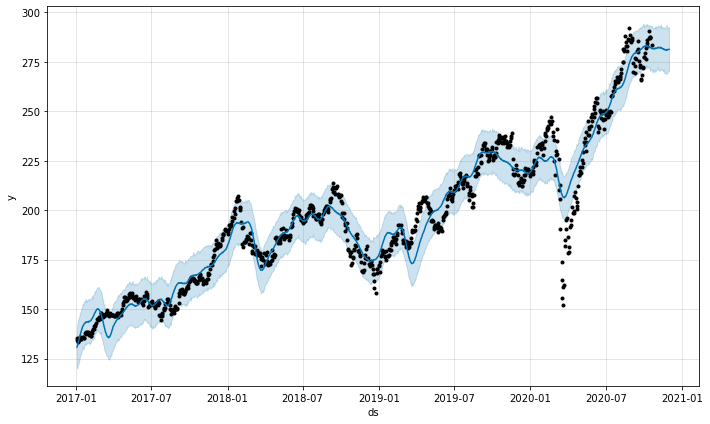

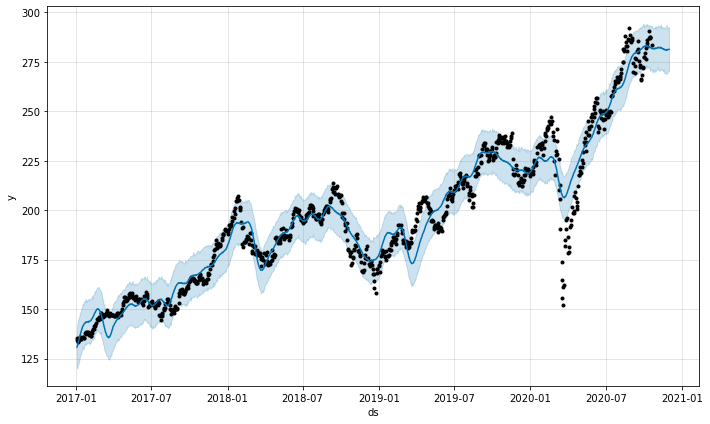

In [18]:
hd = results['HD']
m.plot(hd)

### Оценка качества прогноза

In [19]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df = cmp_df.dropna() # delete NaN
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * abs(cmp_df['e']) / cmp_df['y']
print('MAPE',  np.mean(abs(cmp_df[-predictions:]['p'])))

MAPE 2.3721554613202547


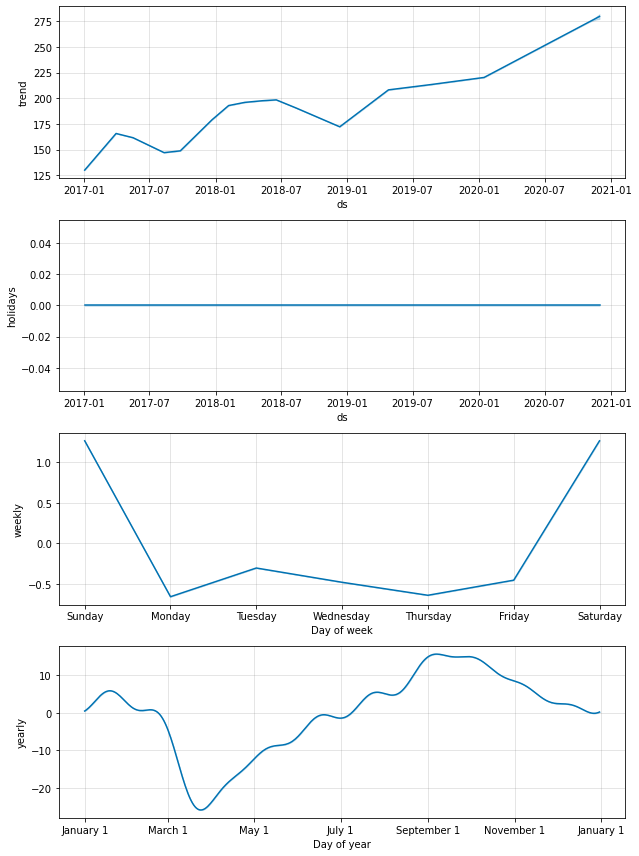

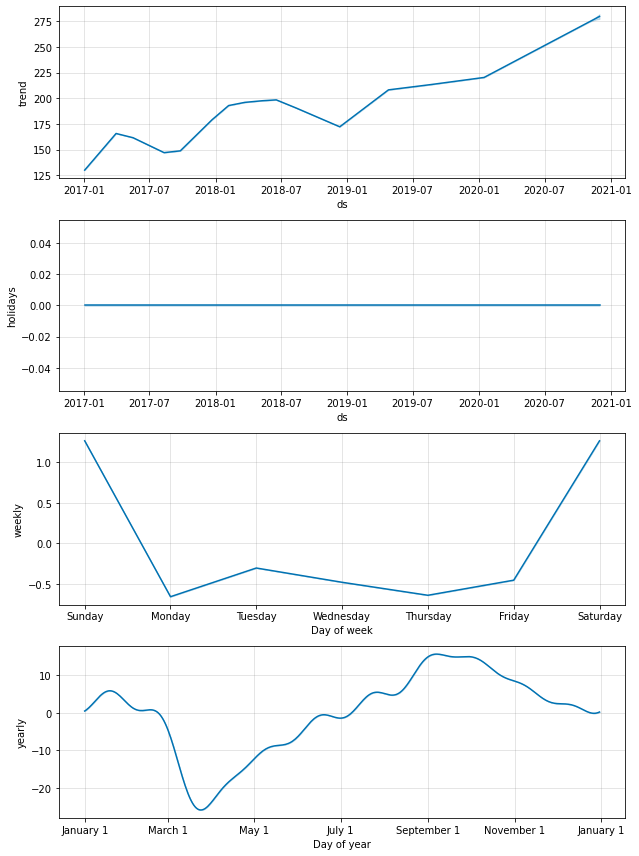

In [21]:
m.plot_components(forecast)